## Linear Regression
A linear model makes predictions by simply computed a weighted sum of the imput features plus a constant called the bias term also called the intercept.

Galton, a cousin of Charles 
Darwin and an accomplished 19th century scientist in his own right, has often been criticized in this century
for his promotion of "eugenics" (planned breeding of huma)5). Historians hae
also suggested that his cousin's lasting fame unfairly overshadowed the substantial scientific contributi ns
Galton made to biology, psychology and applied statistics (see, for example, FitzPatrick 1960). Galton's
fascination with genetics and heredity provided the initial inspiration that led to regression and the PPMC. 

Let´s generate some linear looking data

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


This Python code snippet does the following:

1. **Imports NumPy:** 
   - `import numpy as np`: This line imports the NumPy library, which provides support for numerical operations on arrays.

2. **Generates Random Data:**
   - `X = 2 * np.random.rand(100, 1)`: 
      - `np.random.rand(100, 1)` creates a NumPy array of shape (100, 1) filled with random numbers uniformly distributed between 0 and 1. 
      - Multiplying this array by 2 scales the random values to the range 0 to 2.
   - `y = 4 + 3 * X + np.random.randn(100, 1)`: 
      - `np.random.randn(100, 1)` creates another NumPy array of shape (100, 1) filled with random numbers drawn from a standard normal distribution (mean 0, standard deviation 1).
      - `4 + 3 * X` creates a linear relationship between `X` and `y` with a slope of 3 and an intercept of 4.
      - Adding the normally distributed random values to this linear relationship introduces noise into the data.

**In essence, this code generates a set of 100 data points (X, y) where:**

- `X` is a random variable uniformly distributed between 0 and 2.
- `y` is a noisy linear function of `X` with a slope of 3 and an intercept of 4.

This type of data is often used in machine learning for tasks like linear regression, where the goal is to find the best-fitting line (or hyperplane) that represents the relationship between the input features (X) ad the target variable (y).


### Plotting the data

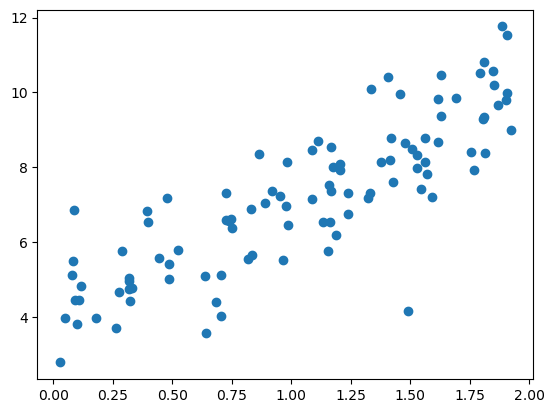

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

Let's performs linear regression using the closed-form solution with Ordinary Least Squares (OLS) and calculates the optimal parameter vector (theta) for the given data. Here's a breakdown of what each step does:

**1. Adding a Column of Ones (X_b):**

* `np.ones((100, 1))` creates a column vector of 1s with 100 rows (assuming you have 100 data instances).
* `np.c_[np.ones((100, 1)), X]` concatenates this column of 1s to the front of the original data matrix `X`. This adds an intercept term (x0 = 1) to each data instance.

**2. Calculating the Optimal Theta (theta_best):**

* `.T`: This transposes the data matrix `X_b`. In linear regression, we typically use the transpose of the design matrix for the calculation.
* `.dot(X_b)`: This performs matrix multiplication between the transposed `X_b` and the original `X_b`. This calculates the inner product between each feature vector and all other feature vectors, including the added intercept term (x0).
* `.inv()`: This calculates the inverse of the result from the previous step. This inversion is used because we're solving for theta in a single step using the closed-form solution.
* `.dot(X_b.T)`: This performs another matrix multiplication between the inverse and the transposed `X_b`.
* `.dot(y)`: This performs the final matrix multiplication between the result from the previous step and the target vector `y`. This essentially calculates the linear combination of features weighted by the optimal parameters that minimizes the squared error between the predicted and actual target values.

**In simpler terms:**

The code calculates the optimal values for the parameters (theta) in the linear regression equation:

```
y = theta_0 * x0 + theta_1 * x1 + ... + theta_n * x_n
```

where:

* `y` is the target variable.
* `x0` is the intercept term (always 1 due to the added column of ones).
* `x1 ... x_n` are the features in your data.
* `theta_0 ... theta_n` are the parameters (weights) to be learned.

The closed-form solution with OLS provides a direct way to compute the optimal theta by inverting the product of the transposed and original design matrix and multiplying it with the target vector.

**Here are some additional points to note:**

* This approach assumes your data has been centered or standardized beforehand for better numerical stability.
* This is a computationally efficient way to solve for the optimal theta when dealing with large datasets.
* There are other methods for solving linear regression problems, such as gradient descent, which can be useful when dealing with non-linear relationships or very large datasets. 

In [4]:
theta_best

array([[4.03685823],
       [2.99643222]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.03685823],
       [10.02972267]])

Here's a breakdown of the precedent code and what it does:

**1. Creating New Data Points (X_new):**

* `X_new = np.array([[0], [2]])` creates a new data matrix `X_new` with two rows and one column. Each row represents a new data instance with a single feature value.
    * The first row has a value of `0`.
    * The second row has a value of `2`.

These new data points will be used to predict their corresponding target values using the linear regression model.

**2. Adding Intercept Term (X_new_b):**

* `np.ones((2, 1))` creates a column vector of ones with two rows (matching the number of rows in `X_new`). This represents the intercept term (x0 = 1) for each new instance.
* `np.c_[np.ones((2, 1)), X_new]` concatenates this column of ones to the front of `X_new`. This adds the intercept term to each data instance in the new data matrix.

**3. Predicting Target Values (y_predict):**

* `X_new_b.dot(theta_best)` performs matrix multiplication between the new data matrix with intercept terms (`X_new_b`) and the optimal parameter vector (`theta_best`) calculated earlier. This essentially calculates the predicted target values (`y_predict`) for the new data points using the linear regression model.

**Overall:**

This code segment uses the previously trained linear regression model (`theta_best`) to predict target values for new data points (`X_new`). It adds the intercept term (x0 = 1) to the new data and then performs matrix multiplication with the optimal parameters to get the predictions.

**The result (y_predict) will be a vector with two elements, each corresponding to the predicted target value for the respective new data point in X_new.**

For example, if `theta_best` contains the values for the intercept and slope learned from the training data, the predicted target values would be:

```
y_predict = [[theta_0 * 1 + theta_1 * 0],  # Prediction for X_new[0] = 0
             [theta_0 * 1 + theta_1 * 2]]  # Prediction for X_new[1] = 2
```

These predictions can be compared to actual target values (if available) for new data to evaluate the performance of the linear regression model.

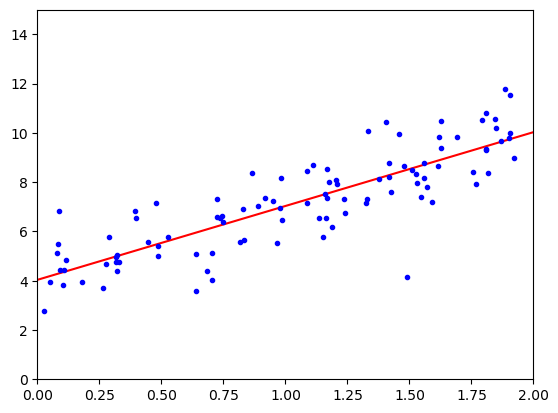

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.03685823]), array([[2.99643222]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.03685823],
       [10.02972267]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.03685823],
       [2.99643222]])

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.03685823],
       [2.99643222]])

In [11]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
m = len(X_b)

def learning_schedule(t):
    return t0 / (t + t1)
    
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [12]:
theta

array([[4.00964555],
       [3.07884597]])